In [ ]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set_style("darkgrid")

In [ ]:
# Mounting the drive where the dataset to work on is saved
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# defining the directory path where the data is stored
directory_path = "/content/drive/MyDrive/"

In [ ]:
# Loading the dataset as pandas data frame
raw_apps_df = pd.read_csv(directory_path + "app rating.csv")

In [ ]:
apps_data = raw_apps_df.copy()

In [ ]:
# Taking a glimpse of the dataset
apps_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,userLang,app_id
0,495266a4-f451-48c3-a844-fb3c07560d55,Foysal Hossain,https://play-lh.googleusercontent.com/a-/ALV-U...,Gett van for no reason ðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,NaN,9/19/2023 15:05,NaN,NaN,NaN,EN,org.telegram.messenger
1,947fcd83-7a28-403d-b03b-d0bc20f52e0e,S K VERMA,https://play-lh.googleusercontent.com/a/ACg8oc...,better' than WhatsApp,4,0,NaN,9/19/2023 14:59,NaN,NaN,NaN,EN,org.telegram.messenger
2,65856211-67ba-4560-84dd-a0055775ed90,Amanuel Abara,https://play-lh.googleusercontent.com/a/ACg8oc...,That was good app for me,5,0,NaN,9/19/2023 14:55,NaN,NaN,NaN,EN,org.telegram.messenger
3,cd5ba250-3a26-43b4-a378-77d18f73a503,Vagarangas X Aopi,https://play-lh.googleusercontent.com/a/ACg8oc...,Love the app,5,0,10.0.4,9/19/2023 14:50,NaN,NaN,10.0.4,EN,org.telegram.messenger
4,e8e886b4-d6c6-416b-b0a1-be90320c4024,Shafin islam,https://play-lh.googleusercontent.com/a-/ALV-U...,ðŸ•³ï¸ðŸ•³ï¸ðŸ•³ï¸,1,0,NaN,9/19/2023 14:48,NaN,NaN,NaN,EN,org.telegram.messenger


In [ ]:
# checking the shape of the dataset
apps_data.shape

(6000, 13)

In [ ]:
# looking at the columns
apps_data.columns

Index(['reviewId', 'userName', 'userImage', 'content', 'score',
       'thumbsUpCount', 'reviewCreatedVersion', 'at', 'replyContent',
       'repliedAt', 'appVersion', 'userLang', 'app_id'],
      dtype='object')

In [ ]:
# basic info
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   at                    6000 non-null   object
 8   replyContent          191 non-null    object
 9   repliedAt             191 non-null    object
 10  appVersion            4396 non-null   object
 11  userLang              6000 non-null   object
 12  app_id                6000 non-null   object
dtypes: int64(2), object(11)
memory usage: 609.5+ KB


In [ ]:
# we are not dropping duplicates - due to loss of huge valuable data
#apps_data.drop_duplicates("reviewId", inplace=True)

In [ ]:
# checking the columns which have missing values
columns_with_missing_values = apps_data.columns[apps_data.isnull().any()]
apps_data[columns_with_missing_values].isnull().sum()

reviewCreatedVersion    1604
replyContent            5809
repliedAt               5809
appVersion              1604
dtype: int64

In [ ]:
# looking at the missing values in column appVersion
#apps_data[apps_data['appVersion'].isna()]

In [ ]:
# filling missing data in appVersion column
#apps_data['appVersion'].fillna('Free', inplace=True)

In [ ]:
# Looking at missing values in column reviewCreatedVersion
#apps_data[apps_data['reviewCreatedVersion'].isna()]

In [ ]:
#apps_data.dropna(subset=['reviewCreatedVersion'], inplace=True)

In [ ]:
# plot distribution rating
#sns.distplot(apps_data['score'])
#plt.show()

In [ ]:
# calculating median value
#median_value = apps_data['score'].median()

In [ ]:
# replacing the missing values with median value
#apps_data['score'].fillna(median_value, inplace=True)

In [ ]:
# dropping unnecessary columns
#apps_data.drop(columns=['reviewCreatedVersion','appVersion'], axis=1, inplace=True)
apps_data.drop(columns=['replyContent','repliedAt'], axis=1, inplace=True)


In [ ]:
# checking the count of missing values
apps_data.isna().sum()

reviewId                   0
userName                   0
userImage                  0
content                    0
score                      0
thumbsUpCount              0
reviewCreatedVersion    1604
at                         0
appVersion              1604
userLang                   0
app_id                     0
dtype: int64

In [ ]:
# basic info
apps_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   at                    6000 non-null   object
 8   appVersion            4396 non-null   object
 9   userLang              6000 non-null   object
 10  app_id                6000 non-null   object
dtypes: int64(2), object(9)
memory usage: 515.8+ KB


In [ ]:
apps_data.rename(columns={'at':'Date'}, inplace=True)

In [ ]:
# Converting 'Date' dtype from object to datetime
def get_date(date_string):
  if isinstance(date_string, datetime.date):
    return date_string
  else:
    return datetime.strptime(date_string, '%d-%m-%Y %H:%M').date()
    apps_data['Date'] = apps_data['Date'].apply(get_date)

In [ ]:
# Looking at the dataset after cleaning it
apps_data.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,Date,appVersion,userLang,app_id
0,495266a4-f451-48c3-a844-fb3c07560d55,Foysal Hossain,https://play-lh.googleusercontent.com/a-/ALV-U...,Gett van for no reason ðŸ˜‚ðŸ˜‚ðŸ˜‚,1,0,NaN,9/19/2023 15:05,NaN,EN,org.telegram.messenger
1,947fcd83-7a28-403d-b03b-d0bc20f52e0e,S K VERMA,https://play-lh.googleusercontent.com/a/ACg8oc...,better' than WhatsApp,4,0,NaN,9/19/2023 14:59,NaN,EN,org.telegram.messenger
2,65856211-67ba-4560-84dd-a0055775ed90,Amanuel Abara,https://play-lh.googleusercontent.com/a/ACg8oc...,That was good app for me,5,0,NaN,9/19/2023 14:55,NaN,EN,org.telegram.messenger
3,cd5ba250-3a26-43b4-a378-77d18f73a503,Vagarangas X Aopi,https://play-lh.googleusercontent.com/a/ACg8oc...,Love the app,5,0,10.0.4,9/19/2023 14:50,10.0.4,EN,org.telegram.messenger
4,e8e886b4-d6c6-416b-b0a1-be90320c4024,Shafin islam,https://play-lh.googleusercontent.com/a-/ALV-U...,ðŸ•³ï¸ðŸ•³ï¸ðŸ•³ï¸,1,0,NaN,9/19/2023 14:48,NaN,EN,org.telegram.messenger


In [ ]:
apps_data.tail()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,Date,appVersion,userLang,app_id
5995,2594c3ec-b0b6-4878-801e-3015dac2dc35,Raffaele Mazzitelli,https://play-lh.googleusercontent.com/a-/ALV-U...,C'Ã¨ un bug quando si effettua il backup da pc...,1,39,8.0.21,7/26/2022 21:25,8.0.21,IT,com.tencent.mm
5996,b8611300-b0f2-49a4-823e-59dab2d0a183,dilailla Yabre,https://play-lh.googleusercontent.com/a-/ALV-U...,non mi fa registrare,3,1,8.0.21,7/24/2022 1:53,8.0.21,IT,com.tencent.mm
5997,26e1a301-6f60-4f74-a5fb-93f7f7f94750,Marco Grandi,https://play-lh.googleusercontent.com/a/ACg8oc...,"Non vale niente come forma di chat, Ã¨ complet...",1,0,NaN,7/21/2022 16:12,NaN,IT,com.tencent.mm
5998,e2395b90-697b-4503-9a2f-28cf7f90f4cf,santo oliva,https://play-lh.googleusercontent.com/a-/ALV-U...,Ottima,5,0,8.0.21,7/18/2022 16:10,8.0.21,IT,com.tencent.mm
5999,461e5faf-82e1-4720-807e-1039e75d9562,Alessandro Viti,https://play-lh.googleusercontent.com/a/ACg8oc...,Ok,5,0,NaN,7/18/2022 15:16,NaN,IT,com.tencent.mm


In [ ]:
apps_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              6000 non-null   object
 1   userName              6000 non-null   object
 2   userImage             6000 non-null   object
 3   content               6000 non-null   object
 4   score                 6000 non-null   int64 
 5   thumbsUpCount         6000 non-null   int64 
 6   reviewCreatedVersion  4396 non-null   object
 7   Date                  6000 non-null   object
 8   appVersion            4396 non-null   object
 9   userLang              6000 non-null   object
 10  app_id                6000 non-null   object
dtypes: int64(2), object(9)
memory usage: 515.8+ KB


In [ ]:
apps_data.describe()

,score,thumbsUpCount
count,6000.000000,6000.000000
mean,3.297167,6.993667
std,1.778122,232.865931
min,1.000000,0.000000
25%,1.000000,0.000000
50%,4.000000,0.000000
75%,5.000000,0.000000
max,5.000000,14491.000000


In [ ]:
# OBSERVATIONS
# Graph 1 - Relation between app ID and their app versions
df = apps_data.groupby(['app_id','appVersion']).count().reset_index()
df = df[['appVersion','app_id','score']]
df1 = df.pivot(columns='appVersion', index='app_id', values='score')

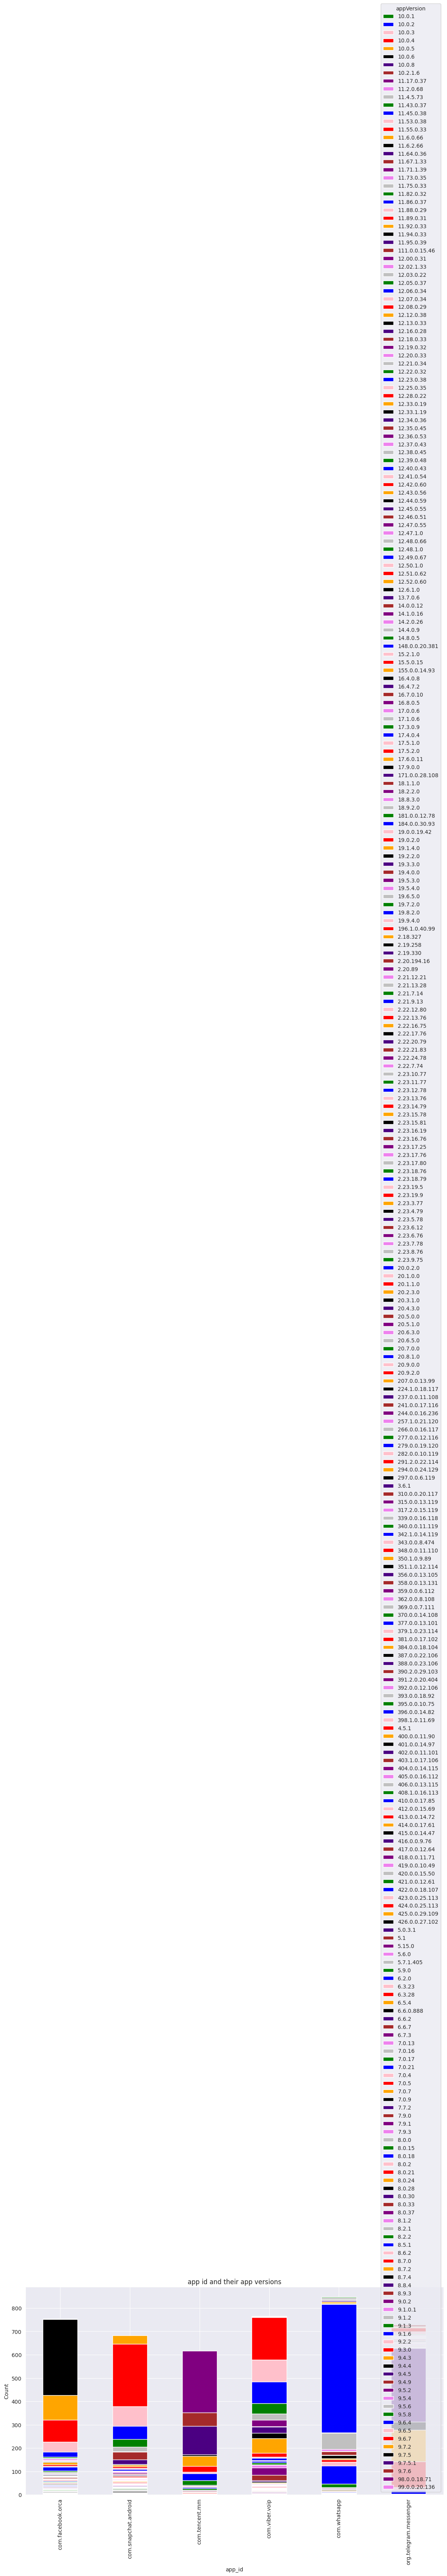

In [ ]:
color_list = ['green','blue','pink','red','orange','black','indigo','brown','purple','violet','silver']
df1.plot(kind='bar', stacked=True, color= color_list, figsize= (14,7))
plt.ylabel("Count")
plt.title("app id and their app versions")
plt.show()

In [ ]:
#Graph 2 - Correleation between score and thumbsUpCount
df2 = apps_data[['score','thumbsUpCount']]

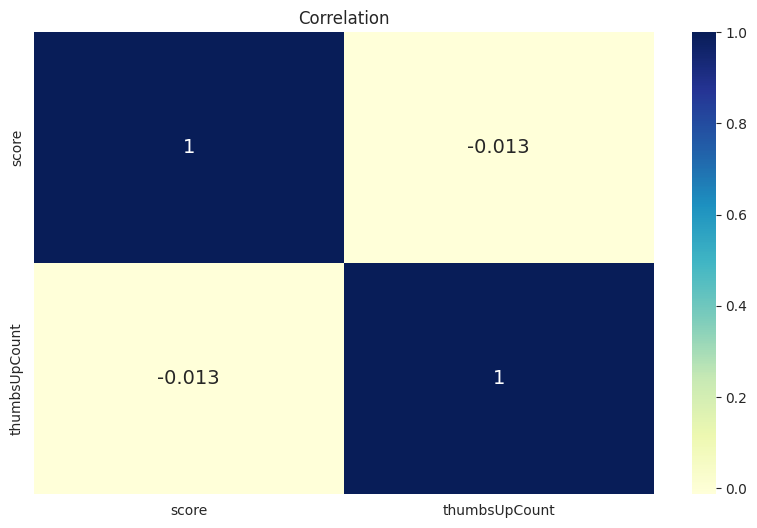

In [ ]:
corr_matrix=df2.corr()
fig, ax = plt.subplots(figsize=(10,6))

#plot it
sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", annot_kws={"size":14})
plt.title("Correlation")

plt.show()

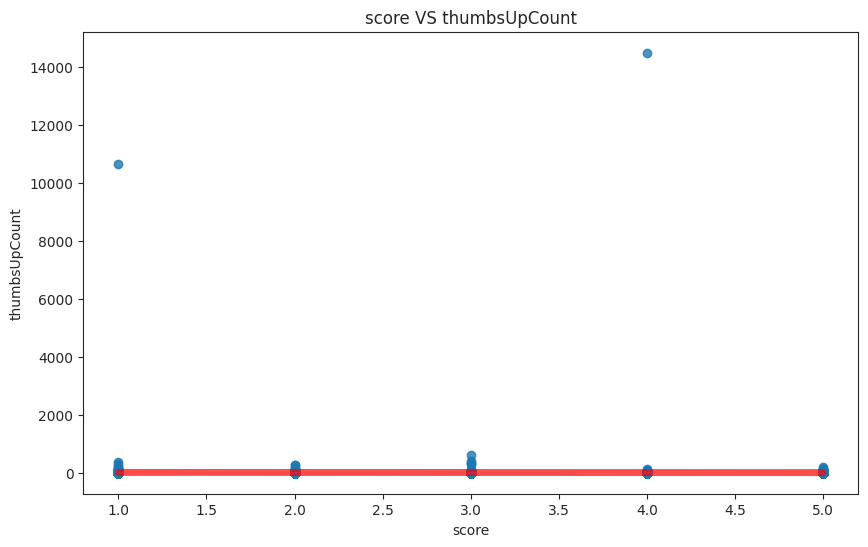

In [ ]:
#Graph 3 - Scatterplot Score vs thumbsUpCount - to check the legitimacy of the scores
sns.set_style("ticks")
fig, ax = plt.subplots(figsize=(10,6))

sns.regplot(x="score", y="thumbsUpCount", data=apps_data, line_kws={"color":"r","alpha":0.7, "lw":5})
plt.title("score VS thumbsUpCount")

plt.show()

In [ ]:
#Graph 4 - Distribution plot
telegram = apps_data[apps_data['app_id'] == "org.telegram.messenger"]['score']
whatsapp = apps_data[apps_data['app_id'] == "com.whatsapp"]['score']
facebook = apps_data[apps_data['app_id'] == "com.facebook.orca"]['score']
viber = apps_data[apps_data['app_id'] == "com.viber.voip"]['score']
snapchat = apps_data[apps_data['app_id'] == "com.snapchat.android"]['score']
tencent = apps_data[apps_data['app_id'] == "com.tencent.mm"]['score']

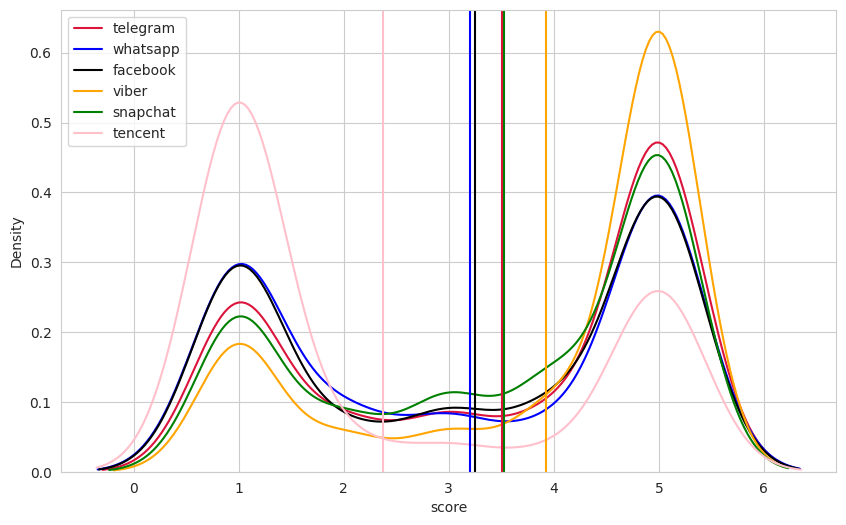

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10,6))

# get rating averages
meanx = telegram.mean()
meany = whatsapp.mean()
meanz = facebook.mean()
meanq = viber.mean()
meanp = snapchat.mean()
means = tencent.mean()

#distribution plot
ax = sns.kdeplot(telegram, shade=False, color='crimson')
ax = sns.kdeplot(whatsapp, shade=False, color='blue')
ax = sns.kdeplot(facebook, shade=False, color='black')
ax = sns.kdeplot(viber, shade=False, color='orange')
ax = sns.kdeplot(snapchat, shade=False, color='green')
ax = sns.kdeplot(tencent, shade=False, color='pink')

#plotting average lines
plt.axvline(x = meanx, color = 'crimson', label = 'telegram')
plt.axvline(x = meany, color = 'blue', label = 'whatsapp')
plt.axvline(x = meanz, color = 'black', label = 'facebook')
plt.axvline(x = meanq, color = 'orange', label = 'viber')
plt.axvline(x = meanp, color = 'green', label = 'snapchat')
plt.axvline(x = means, color = 'pink', label = 'tencent')

# legend
plt.legend(loc = 'upper left')

plt.show()